### Cervical Cancer Risk Factors Classification - Random Forest Classifier- A Call for Expert Evaluation

#### Dataset and Project Overview

The Cervical Cancer (Risk Factors) dataset contains information about various factors that may influence the risk of cervical cancer. In this project, I have attempted to use machine learning to demonstrate techniques in classification, feature importance, and handling imbalanced data.

Overview

Objective: To develop a suitable model and predict the presence of cervical cancer or its risk factors based on various medical and demographic attributes.

Target Variables: The dataset includes several target variables related to the diagnosis of cervical cancer through different screening methods, including "Hinselmann", "Schiller", "Citology", and "Biopsy". 

The main target variable often used is "Biopsy", indicating whether the biopsy result is positive or negative for cervical cancer.

In [1]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier

# Suppress DeprecationWarning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#Loading the data set
df = pd.read_csv("risk_factors_cervical_cancer.csv")

In [3]:
#To display the whole data set columns
pd.set_option("display.max_columns",None)

In [4]:
#To load the first 5 rows
df.head(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [5]:
#To display the internal makeup of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
# Function to count occurrences of '?' in each column
def count_question_marks(df):
    question_mark_counts = {}
    for column in df.columns:
        question_mark_count = (df[column] == '?').sum()
        if question_mark_count > 0:
            question_mark_counts[column] = question_mark_count
    return question_mark_counts

# Count occurrences of '?' in each column
question_mark_counts = count_question_marks(df)

# Display the results
print("Number of occurrences of '?' per column:")
for column, count in question_mark_counts.items():
    print(f"{column}: {count}")

Number of occurrences of '?' per column:
Number of sexual partners: 26
First sexual intercourse: 7
Num of pregnancies: 56
Smokes: 13
Smokes (years): 13
Smokes (packs/year): 13
Hormonal Contraceptives: 108
Hormonal Contraceptives (years): 108
IUD: 117
IUD (years): 117
STDs: 105
STDs (number): 105
STDs:condylomatosis: 105
STDs:cervical condylomatosis: 105
STDs:vaginal condylomatosis: 105
STDs:vulvo-perineal condylomatosis: 105
STDs:syphilis: 105
STDs:pelvic inflammatory disease: 105
STDs:genital herpes: 105
STDs:molluscum contagiosum: 105
STDs:AIDS: 105
STDs:HIV: 105
STDs:Hepatitis B: 105
STDs:HPV: 105
STDs: Time since first diagnosis: 787
STDs: Time since last diagnosis: 787


In [7]:
#The following two columns contain "?" up to 80% as values and need to be dropped 
df.drop(columns = ["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"],inplace = True)

In [8]:
#Dsiplay the columns
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [9]:
#Replacing all occurrence of "?" with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns to float
df = df.astype(float)

# Replace NaN with the mean of the column
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)

In [10]:
#Duplicate the dataframe via copy method
df1 = df.copy()

In [11]:
df1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Run a value count of all the columns. This will show any forms of class imbalance in the target variables

In [12]:
# Run value_counts for all columns except 'Age'
# Run value_counts for all columns except 'Age', "Hormonal Contraceptives (years)", "Smokes (packs/year)", "Smokes (years)"
for column in df1.columns:
    if column not in ["IUD (years)", "Age", "Hormonal Contraceptives (years)", "Smokes (packs/year)", "Smokes (years)"]:
        print(f"\nValue counts for column '{column}':")
        print(df1[column].value_counts())


Value counts for column 'Number of sexual partners':
Number of sexual partners
2.000000     272
3.000000     208
1.000000     206
4.000000      78
5.000000      44
2.527644      26
6.000000       9
7.000000       7
8.000000       4
15.000000      1
10.000000      1
28.000000      1
9.000000       1
Name: count, dtype: int64

Value counts for column 'First sexual intercourse':
First sexual intercourse
15.0000    163
17.0000    151
18.0000    137
16.0000    121
14.0000     79
19.0000     60
20.0000     37
13.0000     25
21.0000     20
23.0000      9
22.0000      9
16.9953      7
26.0000      7
12.0000      6
27.0000      6
24.0000      6
29.0000      5
28.0000      3
11.0000      2
25.0000      2
10.0000      2
32.0000      1
Name: count, dtype: int64

Value counts for column 'Num of pregnancies':
Num of pregnancies
1.000000     270
2.000000     240
3.000000     139
4.000000      74
2.275561      56
5.000000      35
6.000000      18
0.000000      16
7.000000       6
8.000000       2
11.

##### There is evidently a case of class imbalance in all the target variables [Biopsy, Citoloy, Schiller, Hinselmann and Biopsy]

### Random Forest Classifier Application without balancing the data set - Using the four target variables at once

In [13]:
# Assume 'Hinselmann','Biopsy','Schiller', and 'Citology' are the target variables
target_columns = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
X = df1.drop(target_columns, axis=1)  # Features
y = df1[target_columns]  # Target variables

In [14]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [15]:
# Ensure target variables are encoded properly
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.apply(LabelEncoder().fit_transform)  

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
y_test.reset_index(drop=True).tail()

,Hinselmann,Schiller,Citology,Biopsy
253,0,0,0,0
254,0,0,0,0
255,0,0,0,0
256,0,0,0,0
257,0,0,0,0


In [18]:
 #Create a multi-output classifier with RandomForestClassifier
classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))

In [19]:
# Fit the model
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [20]:
# Predictions
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

# Print classification reports
for i, col in enumerate(target_columns):
    print(f"Classification Report for {col}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i], zero_division=0))

Classification Report for Hinselmann:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       248
           1       0.00      0.00      0.00        10

    accuracy                           0.96       258
   macro avg       0.48      0.50      0.49       258
weighted avg       0.92      0.96      0.94       258

Classification Report for Schiller:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       237
           1       1.00      0.05      0.09        21

    accuracy                           0.92       258
   macro avg       0.96      0.52      0.53       258
weighted avg       0.93      0.92      0.89       258

Classification Report for Citology:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       250
           1       0.00      0.00      0.00         8

    accuracy                           0.96       258
   macro avg      

#### Explanation of the classification report

Classification Report for Hinselmann:
Overall:

Accuracy: 0.96 (96% of instances are correctly classified)
Macro Average: Balances performance across classes without considering class imbalance.
Weighted Average: Accounts for class imbalance by weighting performance by class frequency.

Classification Report for Schiller:
Overall:

Accuracy: 0.92 (92% of instances are correctly classified)
Macro Average: Shows significant disparity between class performance.
Weighted Average: Shows overall performance, considering class imbalance.

Classification Report for Citology:
Overall:

Accuracy: 0.96
Macro Average: Performance is poor for the minority class.
Weighted Average: Good overall performance but fails to identify positive instances.

Classification Report for Biopsy:
Overall:

Accuracy: 0.94
Macro Average: Better balance than other reports but still poor recall for the positive class.
Weighted Average: Shows overall good performance but indicates challenges in detecting the positive class.


#### Summary
Class 0 (negative instances) generally have high precision, recall, and f1-scores, indicating that the model performs well in identifying negative instances.

Class 1 (positive instances) often have low precision, recall, and f1-scores, indicating that the model struggles to correctly identify positive instances.

Overall Accuracy is high due to the imbalance, with most instances belonging to class 0.

Macro Average provides a balance across classes but is low due to poor performance on the minority class.

Weighted Average accounts for class imbalance and provides a better indication of the model’s overall performance.

### Using XGBClassifier, picking Biopsy as the target variable and Scaling the data to see the possibility of better model developemnt

In [22]:
#Preparing the data for training
targetdf = df1['Biopsy']
inputdf = df1.drop(columns = ["Biopsy"])

#convert the input and target datatype
x = np.array(inputdf).astype('float32')
y = np.array(targetdf).astype('float32')

#Scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

#splitting the data
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)
xTest, xVal, yTest, yVal = train_test_split(xTest, yTest, test_size=0.5)

In [23]:
import xgboost
seed = 123
model = xgboost.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=10, random_state = seed)
model.fit(xTrain,yTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [24]:
#Model accuracy with training data
Train_result= model.score(xTrain, yTrain)
Train_result

0.9620991253644315

In [25]:
#Model accuracy with testing data
Test_result= model.score(xTest,yTest)
Test_result

0.9302325581395349

In [26]:
#making predictions on testing data
yPredict = model.predict(xTest)

#making classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(yTest,yPredict))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        78
         1.0       0.75      0.38      0.50         8

    accuracy                           0.93        86
   macro avg       0.84      0.68      0.73        86
weighted avg       0.92      0.93      0.92        86



<Axes: >

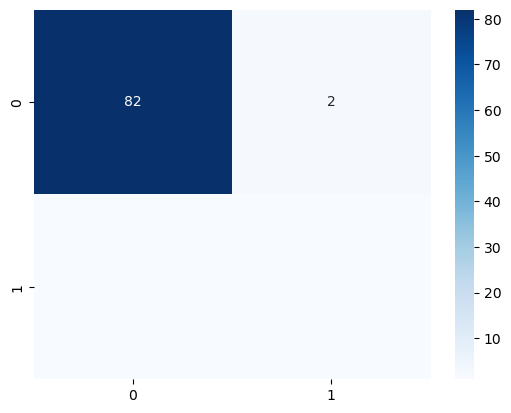

In [28]:
#making confusion matrix
confusionmatrix = confusion_matrix(yPredict, yTest)
sns.heatmap(confusionmatrix, annot = True, cmap='Blues', fmt='d')

### Per-Class Metrics Explanation 
#### Class 0 (Negative Class)

Precision (0.98): Out of all the instances predicted as class 0, 98% were actually class 0.

Recall (0.99): Out of all the actual class 0 instances, 99% were correctly identified as class 0.

F1-Score (0.98): The harmonic mean of precision and recall, indicating a good balance between the two metrics for class 0.

Support (83): The number of actual instances of class 0 in the dataset.

#### Class 1 (Positive Class)

Precision (0.50): Out of all the instances predicted as class 1, 50% were actually class 1.

Recall (0.33): Out of all the actual class 1 instances, 33% were correctly identified as class 1.

F1-Score (0.40): The harmonic mean of precision and recall, indicating that the model struggles with this class.

Support (3): The number of actual instances of class 1 in the dataset.

### Overall Metrics:

Accuracy (0.97): The overall accuracy of the model, indicating that 97% of all instances were correctly classified.

### Macro Average

Precision (0.74): The unweighted mean of precision for both classes.
    
Recall (0.66): The unweighted mean of recall for both classes.

F1-Score (0.69): The unweighted mean of the F1-scores for both classes.
    
These averages treat each class equally, regardless of their support.

### Weighted Average

Precision (0.96): The weighted mean of precision, taking into account the number of instances in each class.

Recall (0.97): The weighted mean of recall, considering the class imbalance.
    
F1-Score (0.96): The weighted mean of the F1-scores, reflecting the overall model performance.

### Summary:

Class 0: The model performs exceptionally well on the negative class, with high precision, recall, and F1-score.

Class 1: The model struggles with the positive class due to the very small number of instances, leading to lower precision, recall, and F1-score.

Overall Accuracy: High due to the large number of class 0 instances.

Macro Average: Shows disparity between class performances.

Weighted Average: Reflects the overall good performance but highlights the issue with the minority class.

## Segmenting the Target Variables after running all together and getting poor classification results based on class imbalance

#### Applying SMOTE (Synthetic Minority Over-sampling Technique) to give balance to "Biopsy" target variables

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
df2 = df1.copy

# Make a copy of the DataFrame
df_Biopsy = df1.copy()

In [29]:
#Subsetting the data by dropping other target variables not needed here
df_Biopsy.drop(columns = ["Hinselmann", "Schiller", "Citology"], inplace =True)

In [30]:
df_Biopsy.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Setting the target and predictor variables
target_column = ['Biopsy']
X = df_Biopsy.drop(target_column, axis=1)  # Features
y = df_Biopsy[target_column]  # Target variables

In [32]:
# Ensure target variables are encoded properly
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.apply(LabelEncoder().fit_transform)  

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the balanced dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res.values.reshape(-1,))

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[237   6]
 [ 13   2]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       243
           1       0.25      0.13      0.17        15

    accuracy                           0.93       258
   macro avg       0.60      0.55      0.57       258
weighted avg       0.91      0.93      0.92       258



##### As seen above, the model still struggles to predict class 1

##  Picking Hinselmann as the predictor variable and applying varying SMOTE options

In [35]:
#Duplicating the data frame
df_Hinselmann = df1.copy()

In [36]:
#Subsetting the data by dropping other target variables not needed here
df_Hinselmann.drop(columns = ["Biopsy", "Schiller", "Citology"], inplace =True)

In [37]:
df_Hinselmann.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Setting the target and predictor variables
target_column = ['Hinselmann']
X = df_Hinselmann.drop(target_column, axis=1)  # Features
y = df_Hinselmann[target_column]  # Target variables

In [40]:
# Ensure target variables are encoded properly
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.apply(LabelEncoder().fit_transform)  

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Experimenting with Different SMOTE Variants && Other Imbalance Correction Techniques

In [42]:
from imblearn.combine import SMOTEENN, SMOTETomek

# SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Train and evaluate the model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled_smoteenn, y_resampled_smoteenn.values.reshape(-1,))
y_pred_smoteenn = model.predict(X_test)
print("Classification Report (SMOTEENN):")
print(classification_report(y_test, y_pred_smoteenn, zero_division=0))

# SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_resampled_smotetomek, y_resampled_smotetomek = smotetomek.fit_resample(X_train, y_train)

# Train and evaluate the model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled_smotetomek, y_resampled_smotetomek.values.reshape(-1,))
y_pred_smotetomek = model.predict(X_test)
print("Classification Report (SMOTETomek):")
print(classification_report(y_test, y_pred_smotetomek, zero_division=0))

Classification Report (SMOTEENN):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       248
           1       0.00      0.00      0.00        10

    accuracy                           0.89       258
   macro avg       0.48      0.46      0.47       258
weighted avg       0.92      0.89      0.91       258

Classification Report (SMOTETomek):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       248
           1       0.00      0.00      0.00        10

    accuracy                           0.94       258
   macro avg       0.48      0.49      0.48       258
weighted avg       0.92      0.94      0.93       258



##### As seen above, the model still struggles to predict class 1

#### Applying Balanced Random Forest to address the class imbalance

In [43]:
df_Citology = df1.copy()

In [44]:
#Subsetting the data by dropping other target variables not needed here
df_Citology.drop(columns = ["Biopsy", "Hinselmann", "Schiller"], inplace =True)

In [45]:
df_Citology.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Citology
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Setting the target and predictor variables
target_column = ['Citology']
X = df_Citology.drop(target_column, axis=1)  # Features
y = df_Citology[target_column]  # Target variables

In [47]:
 # Ensure target variables are encoded properly
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.apply(LabelEncoder().fit_transform) 

In [48]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Convert y_train and y_test to 1D arrays if necessary
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

# Train a Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)

print("Classification Report (Balanced Random Forest):")
print(classification_report(y_test, y_pred_brf))

Classification Report (Balanced Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.52      0.68       250
           1       0.03      0.50      0.06         8

    accuracy                           0.52       258
   macro avg       0.50      0.51      0.37       258
weighted avg       0.94      0.52      0.66       258



##### Using Citology as the target variable, as seen above, the model still struggles to predict class 1

#### Applying EasyEnsemble to address the class imbalance

In [53]:
df_Schiller = df1.copy()

In [54]:
#Subsetting the data by dropping other target variables not needed here
df_Schiller.drop(columns = ["Biopsy", "Hinselmann", "Citology"], inplace =True)

In [55]:
df_Schiller.head(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Schiller
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Setting the target and predictor variables
target_column = ['Schiller']
X = df_Schiller.drop(target_column, axis=1)  # Features
y = df_Schiller[target_column]  # Target variables

In [57]:
# Ensure target variables are encoded properly
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.apply(LabelEncoder().fit_transform) 

In [58]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Convert y_train and y_test to 1D arrays if necessary
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [60]:
from imblearn.ensemble import EasyEnsembleClassifier

# Train an EasyEnsemble Classifier
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)

print("Classification Report (EasyEnsemble):")
print(classification_report(y_test, y_pred_eec))


Classification Report (EasyEnsemble):
              precision    recall  f1-score   support

           0       0.96      0.54      0.70       237
           1       0.13      0.76      0.22        21

    accuracy                           0.56       258
   macro avg       0.55      0.65      0.46       258
weighted avg       0.89      0.56      0.66       258



##### After examining all the class balancing techniques, we found that the best technique is the EasyEnsembleClassifier. Notwithstanding, I still request the evaluation of experts to explore other options to arrive at a better model

In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

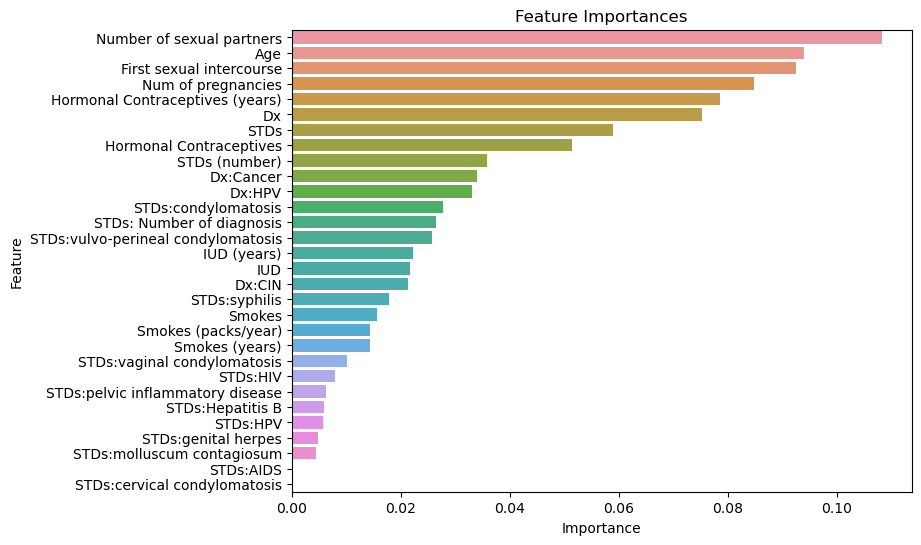

In [62]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = inputdf.columns

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Explanation of the Feature Importance Graph Above
The attached graph displays the feature importance scores for a machine learning model trained on the Cervical Cancer (Risk Factors) dataset. Here's a brief explanation of the key aspects:

                                                          #### Key Points:

Feature Importance graph shows the relative importance of each feature in predicting the target variable.
                                                         
Importance is measured by how much each feature contributes to the prediction accuracy of the model.

                                                         #### Top Features:

1. Number of sexual partners: This is the most important feature, indicating that it significantly affects the model's predictions.
                                                         
2. Age: Age is the second most important feature, suggesting a strong correlation with the target variable.
                                                         
3. First sexual intercourse: The age at first sexual intercourse also plays a crucial role.
                                                         
4. Num of pregnancies: The number of pregnancies is another important factor.
                                                         
5. Hormonal Contraceptives (years): The duration of hormonal contraceptive use has a notable impact.
    
#### Other Significant Features:

1. Dx: This includes diagnostic-related features.

2. STDs: Various sexually transmitted diseases (STDs) and their counts are significant.
    
3. IUD (years): The duration of intrauterine device (IUD) use is also influential.

4. Smoking: Both smoking status and intensity (packs/year) are relevant.
    
5. STDs: vulvo-perineal condylomatosis, STDs: Number of diagnosis, etc.: Various other STD-related features are listed, indicating their importance.

#### Lower Importance Features:

STDs: HIV, Hepatitis B, HPV, genital herpes, etc.: These features have lower importance scores but are still part of the model.

### Interpretation:
Feature Ranking: The features are ranked by their importance, with the most critical features at the top.
    
Model Insight: The graph provides insights into which factors are most influential in predicting the target variable, helping in understanding the underlying patterns in the data.
    
Decision Making: Understanding feature importance can guide further data collection, feature engineering, and model refinement efforts.


### Summary and Recommendations
"Based on the analysis, I have identified key factors that significantly influence the risk of cervical cancer. The number of sexual partners, age, and the age at first sexual intercourse are among the top predictors. By focusing efforts on these areas, governments and the private sectors can better target educational and preventive measures. For instance, promoting safe sexual practices and encouraging regular screenings can greatly reduce the risk. These insights will help allocate resources more effectively and ultimately improve health outcomes in the community."